## Importing Libraries

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Data Preprocessing
##### This includes data loading, data transformation and feature extraction

In [ ]:
# Specifying file paths
json_file = open('C:/Users/vimuk/DL_cw_2/yelp_academic_dataset_review.json', 'r', encoding='utf-8')
csv_file = "resources/pre_processed_reviews.csv"
model1_csv_file = "resources/model2.csv"

# Define a function to process a single JSON object
def pre_process_json():
    object_count = 0
    for line in json_file:
        try:

            if object_count == 1000000:
                break

            # Converting each JSON object into the valid JSON format
            data = json.loads(line)

            # Data Transformation
            stars = int(data['stars'])
            useful = int(data['useful'])
            funny = int(data['funny'])
            cool = int(data['cool'])
            text = str(data['text'])

            # feature extraction
            neutral = funny + cool

            if useful == 0 or funny == 0 or cool == 0:
                continue
            else:
                sentiment_list = [useful, neutral]
                sentiment = sentiment_list.index(max(sentiment_list))
                if stars >= 3 and sentiment == 0:
                    reaction = 'satisfied considerable comment'
                elif stars >= 3 and sentiment == 1:
                    reaction = 'satisfied neutral comment'
                elif stars < 3 and sentiment == 0:
                    reaction = 'unsatisfied considerable comment'
                elif stars < 3 and sentiment == 1:
                    reaction = 'unsatisfied neutral comment'

            data = {'text': [text], 'reaction': [reaction]}
            df = pd.DataFrame(data)

            # Append the data to the CSV file
            if object_count == 0:
                df.to_csv(csv_file, index=False)
            else:
                df.to_csv(csv_file, mode='a', header=False, index=False)

            print(object_count)
            object_count += 1

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            continue

# Call the processing function
pre_process_json()

# Close the JSON file
json_file.close()

## Data Visualization

In [3]:
# loading data into pandas dataframe
df = pd.read_csv(csv_file)
df.head(5)

,text,reaction
0,I am a long term frequent customer of this est...,unsatisfied neutral comment
1,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,satisfied neutral comment
2,I thoroughly enjoyed the show. Chill way to s...,satisfied neutral comment
3,"On a scale of one to things that are awesome, ...",satisfied considerable comment
4,I've only had the cannolis here but they are a...,satisfied neutral comment


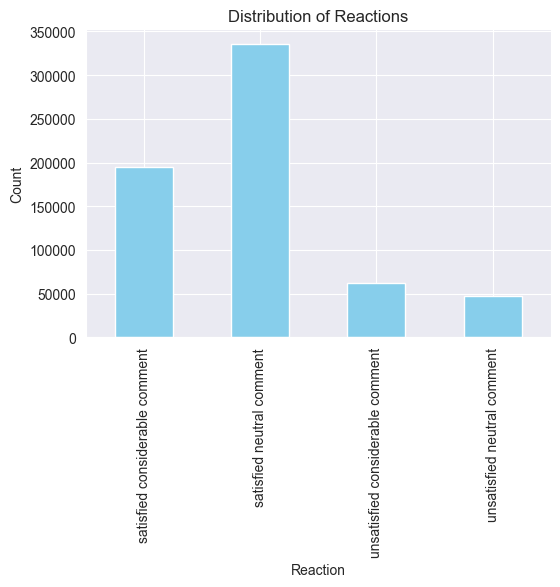

In [4]:
# Plotting the dataframe
plt.figure(figsize=(6, 4))
df['reaction'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Reactions')
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.show()

In [4]:
print(df.groupby('reaction').describe())

                                    text          \
                                   count  unique   
reaction                                           
satisfied considerable comment    194543  194484   
satisfied neutral comment         335511  335359   
unsatisfied considerable comment   62817   62795   
unsatisfied neutral comment        47846   47824   

                                                                                     \
                                                                                top   
reaction                                                                              
satisfied considerable comment    Overrated tourist trap. Go there as a check th...   
satisfied neutral comment         I personally love the service at Publix. They ...   
unsatisfied considerable comment  I would just like to reiterate the fact that t...   
unsatisfied neutral comment       Should be a - star option. We arrive at 8:50 p...   

                         

## Data Balancing
##### Here we have used down sampling technique to get an equal and balanced dataset

In [5]:
# creating different dataframes for different reactions
df_satisfied_considerable = df[df['reaction'] == 'satisfied considerable comment']
df_satisfied_neutral = df[df['reaction'] == 'satisfied neutral comment']
df_unsatisfied_considerable = df[df['reaction'] == 'unsatisfied considerable comment']
df_unsatisfied_neutral = df[df['reaction'] == 'unsatisfied neutral comment']
print(df_unsatisfied_neutral.shape)

(47846, 2)


In [6]:
# Down Sampling
df_satisfied_considerable_downsampled = df_satisfied_considerable.sample(df_unsatisfied_neutral.shape[0])
df_unsatisfied_considerable_downsampled = df_unsatisfied_considerable.sample(df_unsatisfied_neutral.shape[0])
df_satisfied_neutral_downsampled = df_satisfied_neutral.sample(df_unsatisfied_neutral.shape[0])
df_unsatisfied_neutral_downsampled = df_unsatisfied_neutral.sample(df_unsatisfied_neutral.shape[0])

df_balanced = pd.concat([df_satisfied_considerable_downsampled, df_unsatisfied_considerable_downsampled, df_satisfied_neutral_downsampled, df_unsatisfied_neutral_downsampled])
print(df_balanced.shape)
print(df_balanced['reaction'].value_counts())

(191384, 2)
reaction
satisfied considerable comment      47846
unsatisfied considerable comment    47846
satisfied neutral comment           47846
unsatisfied neutral comment         47846
Name: count, dtype: int64


## Constructing the Target Variable
##### Here we are using label encoding to represent target variable in numeric format

In [7]:
# Label Encoding
label_encoder = LabelEncoder()
df_balanced['encoded_reaction'] = label_encoder.fit_transform(df_balanced['reaction'])
print(df_balanced.sample(50))

                                                     text  \
350574  Slow as snail service.  The Scotch Eggs were t...   
532117  Closed!\n\nFirst they stop serving lunch, I th...   
226826  Excellent sushi restaurant that was formerly n...   
531819  Looong wait to be seated....with tons of empty...   
31887   Gets the job done.\n\nIf you're looking for a ...   
303932  I really like this place, however, do not go i...   
369190  I"m in Philly visiting and my cousin told me a...   
67813   I must have came on an off day, or just had an...   
127668  Come armed with a DFWM ("Don't F*ck With Me") ...   
369713  Not many flavor choices and in my opinion weir...   
551432  There has been something that has been botheri...   
217017  Food is ok, cheap furniture, awkward service\n...   
363566  Wow! Who knew that healthy food could taste so...   
276731  A Groupon offer inspired us to test the waters...   
236732  From a vacant hole in the earth at the spot th...   
585280  Weights...check.

In [8]:
# Writing into csv file
model2_csv_file = "resources/model1.csv"
df_balanced.to_csv(model2_csv_file, index=False)